<a href="https://colab.research.google.com/github/Ayush-hm/Google-Colab-ML/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
df = pd.read_csv('Telecom Churn Data SingTel.csv')
df.head()


,State,Account Length,Area Code,Phone Number,International Plan,Voice mail Plan,Num of Voice mail Messages,Total Day Minutes,Total Day Calls,Total day Charge,...,Total Eve Calls,Total Eve Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total International Minutes,Total Intl Calls,Total Intl Charge,Number Customer Service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [ ]:
#df1.info
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone Number',
       'International Plan', 'Voice mail Plan', 'Num of Voice mail Messages',
       'Total Day Minutes', 'Total Day Calls', 'Total day Charge',
       'Total Eve Minutes', 'Total Eve Calls', 'Total Eve Charge',
       'Total Night Minutes', 'Total Night Calls ', 'Total Night Charge',
       'Total International Minutes', 'Total Intl  Calls', 'Total Intl Charge',
       'Number Customer Service calls ', 'Churn'],
      dtype='object')

In [ ]:
df[['Total Night Minutes','Total Eve Charge']]

,Total Night Minutes,Total Eve Charge
0,244.7,16.78
1,254.4,16.62
2,162.6,10.30
3,196.9,5.26
4,186.9,12.61
...,...,...
4995,297.5,18.96
4996,213.6,21.83
4997,212.4,14.69
4998,224.4,14.59


In [ ]:
from sklearn import preprocessing
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
quantile_transformer

QuantileTransformer(random_state=0)

In [ ]:
X_train_trans = quantile_transformer.fit_transform(df[['Total Night Minutes','Total Eve Charge']])
X_train_trans

array([[0.80880881, 0.47047047],
       [0.85825325, 0.45545546],
       [0.22422422, 0.05721767],
       ...,
       [0.59209209, 0.2972973 ],
       [0.68281718, 0.29029029],
       [0.18575891, 0.9049049 ]])

In [ ]:
pd.DataFrame(X_train_trans).describe()


,0,1
count,5000.000000,5000.000000
mean,0.500000,0.499987
std,0.288759,0.288768
min,0.000000,0.000000
25%,0.249751,0.250250
50%,0.500499,0.500000
75%,0.749751,0.749751
max,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(df[['Total Night Minutes','Total Eve Charge']])
scaler.transform(df[['Total Night Minutes','Total Eve Charge']])

array([[0.61949367, 0.54286639],
       [0.64405063, 0.53769007],
       [0.41164557, 0.33322549],
       ...,
       [0.53772152, 0.47525073],
       [0.56810127, 0.47201553],
       [0.39189873, 0.73439016]])

In [ ]:
df['Total Night Minutes'].max() - df['Total Night Charge'].min()

395.0

In [ ]:
pd.DataFrame(quantile_transformer.fit_transform(df[['Total Night Minutes','Total Eve Charge']])).describe()

,0,1
count,5000.000000,5000.000000
mean,0.500000,0.499987
std,0.288759,0.288768
min,0.000000,0.000000
25%,0.249751,0.250250
50%,0.500499,0.500000
75%,0.749751,0.749751
max,1.000000,1.000000


In [ ]:
df.columns
len(set(df.State))

51

In [ ]:
state_dum=pd.get_dummies(df['State'],prefix='state',drop_first=True)
state_dum.head()

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df

,State,Account Length,Area Code,Phone Number,International Plan,Voice mail Plan,Num of Voice mail Messages,Total Day Minutes,Total Day Calls,Total day Charge,...,Total Eve Calls,Total Eve Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total International Minutes,Total Intl Calls,Total Intl Charge,Number Customer Service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,365-8751,no,yes,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False.
4996,WV,152,415,334-9736,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True.
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False.
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False.


In [ ]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone Number',
       'International Plan', 'Voice mail Plan', 'Num of Voice mail Messages',
       'Total Day Minutes', 'Total Day Calls', 'Total day Charge',
       'Total Eve Minutes', 'Total Eve Calls', 'Total Eve Charge',
       'Total Night Minutes', 'Total Night Calls ', 'Total Night Charge',
       'Total International Minutes', 'Total Intl  Calls', 'Total Intl Charge',
       'Number Customer Service calls ', 'Churn'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


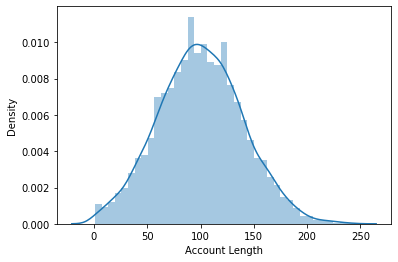

In [ ]:
import seaborn as sns
account_length = df['Account Length']
sns.distplot(account_length)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


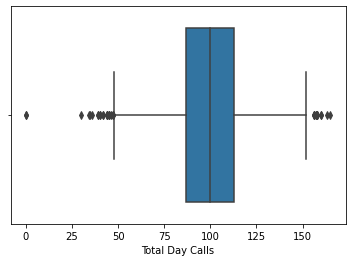

In [ ]:
total_day_calls = df['Total Day Calls']
sns.boxplot(total_day_calls)

In [ ]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
pt

PowerTransformer(method='box-cox', standardize=False)

In [ ]:
total_day_charge = df['Total day Charge']
# pt.fit_transform(total_day_calls,total_day_charge)

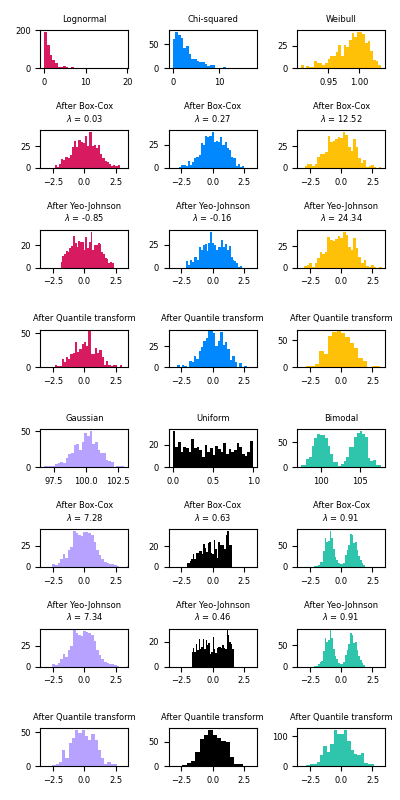

# ***ENCODING CATEGORICAL FEATURES***

In [ ]:
df.head()

,State,Account Length,Area Code,Phone Number,International Plan,Voice mail Plan,Num of Voice mail Messages,Total Day Minutes,Total Day Calls,Total day Charge,...,Total Eve Calls,Total Eve Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total International Minutes,Total Intl Calls,Total Intl Charge,Number Customer Service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [ ]:
print(set(df['Area Code']), set(df['State']), set(df['International Plan']),set(df['Voice mail Plan']),set(df['Churn']))

{408, 510, 415} {'KS', 'NY', 'FL', 'DE', 'LA', 'WV', 'VA', 'AK', 'AZ', 'IA', 'ME', 'PA', 'CT', 'MS', 'CA', 'WA', 'DC', 'KY', 'CO', 'NM', 'HI', 'ND', 'NH', 'SD', 'AR', 'MT', 'SC', 'TX', 'NJ', 'IN', 'NE', 'GA', 'MO', 'MD', 'OK', 'MA', 'TN', 'OR', 'VT', 'UT', 'ID', 'MN', 'NC', 'WY', 'WI', 'OH', 'IL', 'NV', 'MI', 'RI', 'AL'} {' yes', ' no'} {' yes', ' no'} {' False.', ' True.'}


In [ ]:
enc = preprocessing.OneHotEncoder()
enc.fit(df[['State','Area Code']])

OneHotEncoder()

In [ ]:
pd.DataFrame(enc.transform(df[['State','Area Code']]).toarray())

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
OHE_data=pd.get_dummies(df[['State','Area Code','International Plan','Voice mail Plan', 'Churn']],prefix=['state', 'International Plan','Voice mail Plan','Churn'],drop_first=True)
OHE_data.head()

,Area Code,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,International Plan_ yes,Voice mail Plan_ yes,Churn_ True.
0,415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,408,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
OHE_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Area Code                5000 non-null   int64
 1   state_AL                 5000 non-null   uint8
 2   state_AR                 5000 non-null   uint8
 3   state_AZ                 5000 non-null   uint8
 4   state_CA                 5000 non-null   uint8
 5   state_CO                 5000 non-null   uint8
 6   state_CT                 5000 non-null   uint8
 7   state_DC                 5000 non-null   uint8
 8   state_DE                 5000 non-null   uint8
 9   state_FL                 5000 non-null   uint8
 10  state_GA                 5000 non-null   uint8
 11  state_HI                 5000 non-null   uint8
 12  state_IA                 5000 non-null   uint8
 13  state_ID                 5000 non-null   uint8
 14  state_IL                 5000 non-null   uint8
 15  stat

In [ ]:
df.drop(['State','Area Code','International Plan','Voice mail Plan', 'Churn'],inplace= True,axis=1)

In [ ]:
df

,Account Length,Phone Number,Num of Voice mail Messages,Total Day Minutes,Total Day Calls,Total day Charge,Total Eve Minutes,Total Eve Calls,Total Eve Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total International Minutes,Total Intl Calls,Total Intl Charge,Number Customer Service calls
0,128,382-4657,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,371-7191,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,358-1921,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,375-9999,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,330-6626,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,365-8751,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,152,334-9736,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,61,333-6861,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
4998,109,394-2206,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0


In [ ]:
df.columns

Index(['Account Length', 'Phone Number', 'Num of Voice mail Messages',
       'Total Day Minutes', 'Total Day Calls', 'Total day Charge',
       'Total Eve Minutes', 'Total Eve Calls', 'Total Eve Charge',
       'Total Night Minutes', 'Total Night Calls ', 'Total Night Charge',
       'Total International Minutes', 'Total Intl  Calls', 'Total Intl Charge',
       'Number Customer Service calls '],
      dtype='object')

In [ ]:
training_data=pd.concat([df,OHE_data],axis=1)
training_data


,Account Length,Phone Number,Num of Voice mail Messages,Total Day Minutes,Total Day Calls,Total day Charge,Total Eve Minutes,Total Eve Calls,Total Eve Charge,Total Night Minutes,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,International Plan_ yes,Voice mail Plan_ yes,Churn_ True.
0,128,382-4657,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,1,0
1,107,371-7191,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,1,0
2,137,358-1921,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,375-9999,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,1,0,0
4,75,330-6626,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,365-8751,40,235.7,127,40.07,223.0,126,18.96,297.5,...,0,0,0,0,0,0,0,0,1,0
4996,152,334-9736,0,184.2,90,31.31,256.8,73,21.83,213.6,...,0,0,0,0,0,1,0,0,0,1
4997,61,333-6861,0,140.6,89,23.90,172.8,128,14.69,212.4,...,0,0,0,0,0,0,0,0,0,0
4998,109,394-2206,0,188.8,67,32.10,171.7,92,14.59,224.4,...,0,0,0,0,0,0,0,0,0,0


## ***EXPLORATORY DATA ANALYSIS***

In [ ]:
len(df.describe().T)

15

In [ ]:
df.describe()

,Account Length,Num of Voice mail Messages,Total Day Minutes,Total Day Calls,Total day Charge,Total Eve Minutes,Total Eve Calls,Total Eve Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total International Minutes,Total Intl Calls,Total Intl Charge,Number Customer Service calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
training_data.describe()

,Account Length,Num of Voice mail Messages,Total Day Minutes,Total Day Calls,Total day Charge,Total Eve Minutes,Total Eve Calls,Total Eve Charge,Total Night Minutes,Total Night Calls,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,International Plan_ yes,Voice mail Plan_ yes,Churn_ True.
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,...,0.022400,0.023600,0.020200,0.019600,0.021200,0.03160,0.023000,0.094600,0.264600,0.141400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,...,0.147995,0.151815,0.140698,0.138635,0.144065,0.17495,0.149918,0.292691,0.441164,0.348469
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


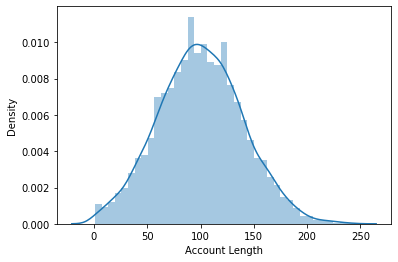

In [ ]:
sns.distplot(df['Account Length'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


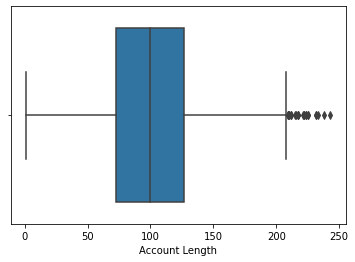

In [ ]:
sns.boxplot(df['Account Length'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


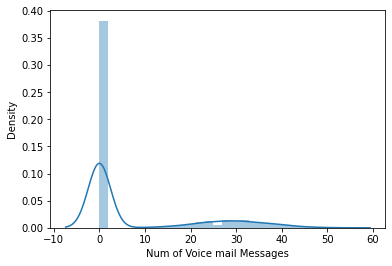

In [ ]:
sns.distplot(df['Num of Voice mail Messages'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


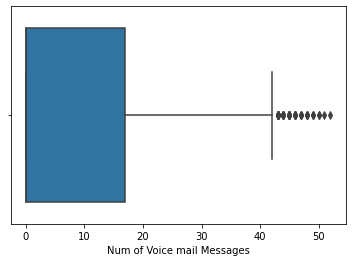

In [ ]:
sns.boxplot(df['Num of Voice mail Messages'])

In [ ]:
len(set(df['Num of Voice mail Messages']))

48

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer as kbd
enc=kbd(n_bins=5, encode='ordinal', strategy='uniform')
enc.fit(df[['Num of Voice mail Messages']])
num_vmail_binned = enc.transform(df[['Num of Voice mail Messages']])

num_vmail_mess_dum = pd.get_dummies(num_vmail_binned.ravel(),prefix='Num of Voice mail Messages',drop_first= True)
num_vmail_mess_dum.head()

,Num of Voice mail Messages_1.0,Num of Voice mail Messages_2.0,Num of Voice mail Messages_3.0,Num of Voice mail Messages_4.0
0,0,1,0,0
1,0,1,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [ ]:
training_data = pd.concat([num_vmail_mess_dum,training_data],axis=1)
training_data

,Num of Voice mail Messages_1.0,Num of Voice mail Messages_2.0,Num of Voice mail Messages_3.0,Num of Voice mail Messages_4.0,Num of Voice mail Messages_1.0,Num of Voice mail Messages_2.0,Num of Voice mail Messages_3.0,Num of Voice mail Messages_4.0,Account Length,Phone Number,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,International Plan_ yes,Voice mail Plan_ yes,Churn_ True.
0,0,1,0,0,0,1,0,0,128,382-4657,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,107,371-7191,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,137,358-1921,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,84,375-9999,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,75,330-6626,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,1,0,0,0,1,0,50,365-8751,...,0,0,0,0,0,0,0,0,1,0
4996,0,0,0,0,0,0,0,0,152,334-9736,...,0,0,0,0,0,1,0,0,0,1
4997,0,0,0,0,0,0,0,0,61,333-6861,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,109,394-2206,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_training_data = pd.concat((training_data,))